In [12]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
from matplotlib.colors import LogNorm


In [13]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [14]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

from scipy import integrate

In [15]:
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl/exp/"

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

In [16]:
epgExpInb = copy(exp_1g_corr)
epgExpInbCDFT = epgExpInb.loc[exp_1g_corr.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

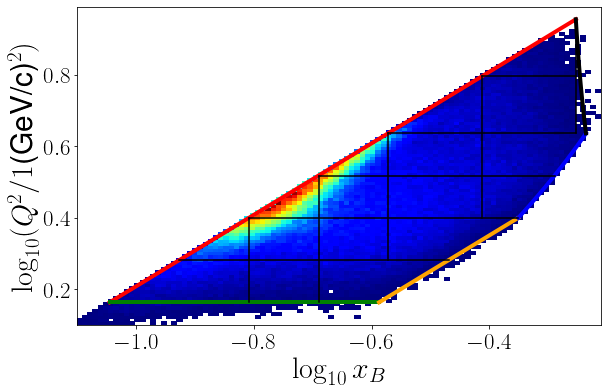

In [17]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
# plt.hist2d(epgExpInb.loc[epgExpInb.tmin2>0.3].xB, epgExpInb.loc[epgExpInb.tmin2>0.3].Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1)
# plt.hist2d(np.log10(epgExpInbFD.xB), np.log10(epgExpInbFD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCD.xB), np.log10(epgExpInbCD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 1, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCDFT.xB), np.log10(epgExpInbCDFT.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
plt.hist2d(np.log10(epgExpInb.xB), np.log10(epgExpInb.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.99, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInb61.xB), np.log10(epgExpInb61.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.99, 101)], cmin = 1, cmap = cmap)

k= 2*M*(np.sqrt(0.8**2+M**2)-M)
# plt.axvline(0.5)
# plt.axvline(0.4)
# plt.axvline(0.3)
# plt.axvline(0.2)
# plt.axvline(0.1)
x1 = 1.456/2/M/8.604
# plt.axvline(np.log10(x1))
x2 = 1.456/2/M/3
# plt.axvline(np.log10(x2))
x3 = 1-(4-M**2)/2/M/3
# plt.axvline(np.log10(x3))
x4 = 2*(1-np.sqrt((k-M**4+4*M**2)/k))/(M**4/k - 4*M**2/k)
# plt.axvline(np.log10(x4))
x5 = (-1+np.sqrt(1+4*M**2/k*(1+M/8.604/2)))/2/M**2*k
# plt.axvline(np.log10(x5))
y1 = 1.456
y2 = 1.456
y3 = 6*M*x3
y4 = (4-M**2)*x4/(1-x4)
y5 = 2*M*8.604*x5

l1 = np.linspace(x1, x5, 101)
plt.plot(np.log10(l1), np.log10(l1*2*M*(10.604-2)), color = 'r', linewidth = 4)
l2 = np.linspace(x1, x2, 101)
plt.plot(np.log10(l2), np.log10(y2+l2*0), color = 'green', linewidth = 4)
l3 = np.linspace(x2, x3, 101)
plt.plot(np.log10(l3), np.log10(l3*2*M*(3)), color = 'orange', linewidth = 4)
k= 2*M*(np.sqrt(0.8**2+M**2)-M)
l4 = np.linspace(x3, x4, 101)
plt.plot(np.log10(l4), np.log10((4 - M*M)*l4/(1 - l4)), color = 'b', linewidth = 4)
l5 = np.linspace(x5, x4, 101)
plt.plot(np.log10(l5), np.log10(M*M*l5/(M*M*l5*l5/k-(1-l5))), color = 'k', linewidth = 4)

# c11 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/8.6048
# c12 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/3
c1 = np.sqrt(y2*y3)/2/M/8.604
d1 = np.sqrt(y2*y3)/2/M/3
# plt.plot(np.linspace(np.log10(c1),np.log10(c1), 101), np.linspace(np.log10(y1), np.log10(np.sqrt(y1*y3)), 101))
c2 = y3/2/M/8.604
d2 = x3
plt.plot(np.linspace(np.log10(c2),np.log10(c2), 101), np.linspace(np.log10(y1), np.log10(y3), 101), color='k')
c3 = np.sqrt(y3*y4)/2/M/8.604
d3 = 1/(1+(4-M*M)/np.sqrt(y3*y4))
plt.plot(np.linspace(np.log10(c3),np.log10(c3), 101), np.linspace(np.log10(y1), np.log10(np.sqrt(y3*y4)), 101), color='k')
c4 = y4/2/M/8.604
d4 = x5
plt.plot(np.linspace(np.log10(c4),np.log10(c4), 101), np.linspace(np.log10(np.sqrt(y1*y3)), np.log10(y4), 101), color='k')
c5 = np.sqrt(y4*y5)/2/M/8.604
d5 = x5
plt.plot(np.linspace(np.log10(c5),np.log10(c5), 101), np.linspace(np.log10(y3), np.log10(np.sqrt(y4*y5)), 101), color='k')
plt.plot(np.linspace(np.log10(x5),np.log10(x5), 101), np.linspace(np.log10(y4), np.log10(y5), 101), color='k')

plt.plot(np.linspace(np.log10(c1), np.log10(d1), 101), np.linspace(np.log10(np.sqrt(y1*y3)), np.log10(np.sqrt(y1*y3)), 101), color='k')
plt.plot(np.linspace(np.log10(c2), np.log10(d2), 101), np.linspace(np.log10(y3), np.log10(y3), 101), color='k')
plt.plot(np.linspace(np.log10(c3), np.log10(d3), 101), np.linspace(np.log10(np.sqrt(y3*y4)), np.log10(np.sqrt(y3*y4)), 101), color='k')
plt.plot(np.linspace(np.log10(c4), np.log10(d4), 101), np.linspace(np.log10(y4), np.log10(y4), 101), color='k')
plt.plot(np.linspace(np.log10(c5), np.log10(d5), 101), np.linspace(np.log10(np.sqrt(y4*y5)), np.log10(np.sqrt(y4*y5)), 101), color='k')

plt.xlabel(r"$\log_{10} x_B$")
plt.ylabel(r"$\log_{10}(Q^2/1 $"+GeVc2+r"$)$")
plt.show()

In [113]:
tedges = [10**(-0.9), 10**(-0.725), 10**(-0.55), 10**(-0.375), 10**(-0.2)]
tedges = [0.126,      0.25,         0.375,      0.5,        0.631]
def tbinning(df):
#     return df[(df.t2>=10**(-0.9))&(df.t2<10**(-0.725))], df[(df.t2>=10**(-0.725))&(df.t2<10**(-0.55))], df[(df.t2>=10**(-0.55))&(df.t2<10**(-0.375))], df[(df.t2>=10**(-0.375))&(df.t2<=10**(-0.2))]
    return df[(df.t2>=tedges[0])&(df.t2<tedges[1])], df[(df.t2>=tedges[1])&(df.t2<tedges[2])], df[(df.t2>=tedges[2])&(df.t2<tedges[3])], df[(df.t2>=tedges[3])&(df.t2<=tedges[4])]

In [114]:
epgExpInb1 = epgExpInb.loc[(epgExpInb.Q2>y1)&(epgExpInb.Q2<np.sqrt(y1*y3))]
epgExpInb11 = epgExpInb1.loc[(epgExpInb1.xB<c2)&(epgExpInb1.Q2<=2*M*(10.604-2)*epgExpInb1.xB)]
epgExpInb12 = epgExpInb1.loc[(epgExpInb1.xB>=c2)&(epgExpInb1.xB<c3)]
epgExpInb13 = epgExpInb1.loc[(epgExpInb1.xB>=c3)&(epgExpInb1.Q2>=2*M*3*epgExpInb1.xB)]
epgExpInb111, epgExpInb112, epgExpInb113, epgExpInb114 = tbinning(epgExpInb11)
epgExpInb121, epgExpInb122, epgExpInb123, epgExpInb124 = tbinning(epgExpInb12)
epgExpInb131, epgExpInb132, epgExpInb133, epgExpInb134 = tbinning(epgExpInb13)

epgExpInb2 = epgExpInb.loc[(epgExpInb.Q2>np.sqrt(y1*y3))&(epgExpInb.Q2<y3)]
epgExpInb21 = epgExpInb2.loc[(epgExpInb2.xB<c2)&(epgExpInb2.Q2<2*M*(10.604-2)*epgExpInb2.xB)]
epgExpInb22 = epgExpInb2.loc[(epgExpInb2.xB>=c2)&(epgExpInb2.xB<c3)]
epgExpInb23 = epgExpInb2.loc[(epgExpInb2.xB>=c3)&(epgExpInb2.xB<c4)]
epgExpInb24 = epgExpInb2.loc[(epgExpInb2.xB>=c4)&(epgExpInb2.Q2>=2*M*3*epgExpInb2.xB)]
epgExpInb211, epgExpInb212, epgExpInb213, epgExpInb214 = tbinning(epgExpInb21)
epgExpInb221, epgExpInb222, epgExpInb223, epgExpInb224 = tbinning(epgExpInb22)
epgExpInb231, epgExpInb232, epgExpInb233, epgExpInb234 = tbinning(epgExpInb23)
epgExpInb241, epgExpInb242, epgExpInb243, epgExpInb244 = tbinning(epgExpInb24)

epgExpInb3 = epgExpInb.loc[(epgExpInb.Q2>y3)&(epgExpInb.Q2<np.sqrt(y3*y4))]
epgExpInb31 = epgExpInb3.loc[(epgExpInb3.xB<c3)&(epgExpInb3.Q2<2*M*(10.604-2)*epgExpInb3.xB)]
epgExpInb32 = epgExpInb3.loc[(epgExpInb3.xB>=c3)&(epgExpInb3.xB<c4)]
epgExpInb33 = epgExpInb3.loc[(epgExpInb3.xB>=c4)&(epgExpInb3.xB<c5)]
epgExpInb34 = epgExpInb3.loc[(epgExpInb3.xB>=c5)&(epgExpInb3.Q2>=(4 - M*M)*epgExpInb3.xB/(1 - epgExpInb3.xB))]
epgExpInb311, epgExpInb312, epgExpInb313, epgExpInb314 = tbinning(epgExpInb31)
epgExpInb321, epgExpInb322, epgExpInb323, epgExpInb324 = tbinning(epgExpInb32)
epgExpInb331, epgExpInb332, epgExpInb333, epgExpInb334 = tbinning(epgExpInb33)
epgExpInb341, epgExpInb342, epgExpInb343, epgExpInb344 = tbinning(epgExpInb34)

epgExpInb4 = epgExpInb.loc[(epgExpInb.Q2>np.sqrt(y3*y4))&(epgExpInb.Q2<y4)]
epgExpInb41 = epgExpInb4.loc[(epgExpInb4.xB<c4)&(epgExpInb4.Q2<2*M*(10.604-2)*epgExpInb4.xB)]
epgExpInb42 = epgExpInb4.loc[(epgExpInb4.xB>=c4)&(epgExpInb4.xB<c5)]
epgExpInb43 = epgExpInb4.loc[(epgExpInb4.xB>=c5)&(epgExpInb4.Q2>=(4 - M*M)*epgExpInb4.xB/(1 - epgExpInb4.xB))]
epgExpInb411, epgExpInb412, epgExpInb413, epgExpInb414 = tbinning(epgExpInb41)
epgExpInb421, epgExpInb422, epgExpInb423, epgExpInb424 = tbinning(epgExpInb42)
epgExpInb431, epgExpInb432, epgExpInb433, epgExpInb434 = tbinning(epgExpInb43)

epgExpInb5 = epgExpInb.loc[(epgExpInb.Q2>y4)&(epgExpInb.Q2<np.sqrt(y4*y5))]
epgExpInb51 = epgExpInb5.loc[(epgExpInb5.xB<c5)&(epgExpInb5.Q2<2*M*(10.604-2)*epgExpInb5.xB)]
epgExpInb52 = epgExpInb5.loc[(epgExpInb5.xB>=c5)&(epgExpInb5.xB<x5)]
epgExpInb511, epgExpInb512, epgExpInb513, epgExpInb514 = tbinning(epgExpInb51)
epgExpInb521, epgExpInb522, epgExpInb523, epgExpInb524 = tbinning(epgExpInb52)

epgExpInb6 = epgExpInb.loc[(epgExpInb.Q2>np.sqrt(y4*y5))&(epgExpInb.Q2<y5)]
epgExpInb61 = epgExpInb6.loc[(epgExpInb6.xB<x5)&(epgExpInb6.Q2<2*M*(10.604-2)*epgExpInb6.xB)]
epgExpInb611, epgExpInb612, epgExpInb613, epgExpInb614 = tbinning(epgExpInb61)

In [115]:
print(len(epgExpInb111), len(epgExpInb112), len(epgExpInb113), len(epgExpInb114))
print(len(epgExpInb121), len(epgExpInb122), len(epgExpInb123), len(epgExpInb124))
print(len(epgExpInb131), len(epgExpInb132), len(epgExpInb133), len(epgExpInb134))
print(len(epgExpInb211), len(epgExpInb212), len(epgExpInb213), len(epgExpInb214))
print(len(epgExpInb221), len(epgExpInb222), len(epgExpInb223), len(epgExpInb224))
print(len(epgExpInb231), len(epgExpInb232), len(epgExpInb233), len(epgExpInb234))
print(len(epgExpInb241), len(epgExpInb242), len(epgExpInb243), len(epgExpInb244))
print(len(epgExpInb311), len(epgExpInb312), len(epgExpInb313), len(epgExpInb314))
print(len(epgExpInb321), len(epgExpInb322), len(epgExpInb323), len(epgExpInb324))
print(len(epgExpInb331), len(epgExpInb332), len(epgExpInb333), len(epgExpInb334))
print(len(epgExpInb341), len(epgExpInb342), len(epgExpInb343), len(epgExpInb344))
print(len(epgExpInb411), len(epgExpInb412), len(epgExpInb413), len(epgExpInb414))
print(len(epgExpInb421), len(epgExpInb422), len(epgExpInb423), len(epgExpInb424))
print(len(epgExpInb431), len(epgExpInb432), len(epgExpInb433), len(epgExpInb434))
print(len(epgExpInb511), len(epgExpInb512), len(epgExpInb513), len(epgExpInb514))
print(len(epgExpInb521), len(epgExpInb522), len(epgExpInb523), len(epgExpInb524))
print(len(epgExpInb611), len(epgExpInb612), len(epgExpInb613), len(epgExpInb614))

5054 2494 1668 770
2487 1032 707 325
2311 1479 680 269
7429 2634 1922 916
12363 5913 4552 1794
6349 3990 2168 936
2207 4072 2465 763
19582 10650 5034 1418
8823 8276 5797 2001
2996 6429 4199 1508
0 1607 1657 569
7102 7758 4579 1369
2337 5910 4341 1788
0 2093 2906 1397
976 3229 2554 1099
0 2286 3026 1500
0 0 553 369


In [14]:
Q2bin_i = [y1, np.sqrt(y1*y3), y3, np.sqrt(y3*y4), y4, np.sqrt(y4*y5)]
Q2bin_f = [np.sqrt(y1*y3), y3, np.sqrt(y3*y4), y4, np.sqrt(y4*y5), y5]
xBbin_i = {1: [[x1, c1], c2, c3], 2: [[c1, c2], c2, c3, c4], 3: [[c2, c3], c3, c4, c5], 4: [[c3, c4], c4, c5], 5: [[c4, c5], c5], 6: [[c5, x5]]}
xBbin_f = {1: [c2, c3, [x2, d1]], 2: [c2, c3, c4, [d1, d2]], 3: [c3, c4, c5, [d2, d3]], 4: [c4, c5, [d3, d4]], 5: [c5, x5], 6: [x5]}
tbin_i = [10**(-1.1), 10**(-0.8), 10**(-0.6), 10**(-0.4)]
tbin_f = [10**(-0.8), 10**(-0.6), 10**(-0.4), 10**(-0.2)]
goodBins = [111, 112, 113, 114, 121, 122, 123, 124, 131, 132, 133, 134, 211,
       212, 213, 214, 221, 222, 223, 224, 231, 232, 233, 234, 242, 243,
       244, 311, 312, 313, 314, 321, 322, 323, 324, 332, 333, 334, 343,
       344, 411, 412, 413, 414, 422, 423, 424, 433, 434, 512, 513, 514,
       523, 524, 613, 614]
badBins = [241, 331, 341, 342, 421, 431, 432, 511, 521, 522, 611, 612, 613]

In [116]:
df_global = pd.DataFrame()
total = epgExpInb
badBins = []
for Q2bin in range(0, len(Q2bin_i)):#Q2 bin
    for xBbin in range(0, len(xBbin_i[Q2bin+1])):
        for tbin in range(0, len(tbin_i)):
            local = total
            Q2_i = Q2bin_i[Q2bin]
            Q2_f = Q2bin_f[Q2bin]
            xB_i = xBbin_i[Q2bin+1][xBbin]
            xB_f = xBbin_f[Q2bin+1][xBbin]
            t_i = tbin_i[tbin]
            t_f = tbin_f[tbin]
            #cut by Q2
            if Q2bin == len(Q2bin_i)-1:
                local = local.loc[(local.Q2>=Q2_i) & (local.Q2<=Q2_f)]
            else:
                local = local.loc[(local.Q2>=Q2_i) & (local.Q2<Q2_f)]
            #cut by xB
            #xB lower bound
            if xBbin == 0:
                local = local.loc[local.Q2<=2*M*(10.604-2)*local.xB, :]
            else:
                local = local.loc[local.xB>=xB_i] 
            #xB upper bound
            if (xBbin == len(xBbin_i[Q2bin+1])-1) & (Q2bin < 2):
                local = local.loc[local.Q2>=2*M*3*local.xB]
            elif (xBbin == len(xBbin_i[Q2bin+1])-1) & (Q2bin < 4):
                local = local.loc[local.Q2>=(4 - M*M)*local.xB/(1 - local.xB)]
            else:
                local = local.loc[local.xB<xB_f]
            #cut by t
            if tbin == len(tbin_i)-1:
                local = local.loc[(local.t2>=t_i) & (local.t2<=t_f)]
            else:
                local = local.loc[(local.t2>=t_i) & (local.t2<t_f)]
            Q2xBtbin = 100*(Q2bin+1) + 10*(xBbin+1) + (tbin+1)
            
            if len(local)<600:
                badBins.append(Q2xBtbin)
                continue
#             if Q2xBtbin in badBins:
#                 continue

            df_local = pd.DataFrame()
            phi_i = np.array([*np.linspace(0, 90, 7), *pd.qcut(local.loc[(local.phi2>90)&(local.phi2<270)]['phi2'], q = 12, retbins = True)[1][1:-1], *np.linspace(270, 360, 7)])[:-1]
            phi_f = np.array([*np.linspace(0, 90, 7), *pd.qcut(local.loc[(local.phi2>90)&(local.phi2<270)]['phi2'], q = 12, retbins = True)[1][1:-1], *np.linspace(270, 360, 7)])[1:]
            df_local.loc[:, "phi_i"] = phi_i
            df_local.loc[:, "phi_f"] = phi_f
            df_local.loc[:, "phi"] = df_local.index
            if type(xB_i) is list:
                df_local.loc[:, "xB_i"] = xB_i[0]
            else:
                df_local.loc[:, "xB_i"] = xB_i
            if type(xB_f) is list:
                df_local.loc[:, "xB_f"] = xB_f[1]
            else:
                df_local.loc[:, "xB_f"] = xB_f
            df_local.loc[:, "xB"] = xBbin+1
            df_local.loc[:, "Q2_i"] = Q2_i
            df_local.loc[:, "Q2_f"] = Q2_f
            df_local.loc[:, "Q2"] = Q2bin+1
            df_local.loc[:, "t_i"] = t_i
            df_local.loc[:, "t_f"] = t_f            
            df_local.loc[:, "t"] = tbin+1
            df_local.loc[:, "Q2xBt"] = Q2xBtbin
            if xBbin == 0:
                binVol = (xB_f-(xB_i[1]+xB_i[0])/2)*(Q2_f-Q2_i)*(t_f-t_i)*np.radians((phi_f - phi_i))
            elif (xBbin == len(xBbin_i[Q2bin+1])-1) & (Q2bin < 2):
                binVol = ((xB_f[1]+xB_f[0])/2-xB_i)*(Q2_f-Q2_i)*(t_f-t_i)*np.radians((phi_f - phi_i))
            elif (xBbin == len(xBbin_i[Q2bin+1])-1) & (Q2bin < 4):
                binVol = integrate.quad(lambda y: (1/(1+(4-M*M)/y) - xB_i), Q2_i, Q2_f)[0]*(t_f-t_i)*np.radians((phi_f - phi_i))
            elif xBbin == len(xBbin_i[Q2bin+1])-1:
                binVol = 1/2*(xB_f-xB_i)*(Q2_f-Q2_i)*(t_f-t_i)*np.radians((phi_f - phi_i))
            else:
                binVol = (xB_f-xB_i)*(Q2_f-Q2_i)*(t_f-t_i)*np.radians((phi_f - phi_i))
            df_local.loc[:, "binVol"] = binVol
            df_global = pd.concat([df_global, df_local])
                
df_global.index = np.linspace(0, len(df_global)-1, len(df_global)).astype(int)
df_global.loc[:, "Q2xBtphi"] = df_global.index

In [117]:
print(badBins)

[241, 331, 341, 342, 421, 431, 432, 511, 521, 522, 611, 612, 613]


In [118]:
def numberingDF(total, Q2bin_i=Q2bin_i, Q2bin_f=Q2bin_f, xBbin_i=xBbin_i, xBbin_f=xBbin_f, tbin_i=tbin_i, tbin_f=tbin_f, goodBins=goodBins, badBins=badBins, df_global=df_global):
    df_allBins = {}
    Q2xBtphi = 0

    for Q2bin in range(0, len(Q2bin_i)):#Q2 bin
        for xBbin in range(0, len(xBbin_i[Q2bin+1])):
            for tbin in range(0, len(tbin_i)):
                local = total
                Q2_i = Q2bin_i[Q2bin]
                Q2_f = Q2bin_f[Q2bin]
                xB_i = xBbin_i[Q2bin+1][xBbin]
                xB_f = xBbin_f[Q2bin+1][xBbin]
                t_i = tbin_i[tbin]
                t_f = tbin_f[tbin]
                #cut by Q2
                if Q2bin == len(Q2bin_i)-1:
                    local = local.loc[(local.Q2>=Q2_i) & (local.Q2<=Q2_f)]
                else:
                    local = local.loc[(local.Q2>=Q2_i) & (local.Q2<Q2_f)]
                #cut by xB
                #xB lower bound
                if xBbin == 0:
                    local = local.loc[local.Q2<=2*M*(10.604-2)*local.xB, :]
                else:
                    local = local.loc[local.xB>=xB_i] 
                #xB upper bound
                if (xBbin == len(xBbin_i[Q2bin+1])-1) & (Q2bin < 2):
                    local = local.loc[local.Q2>=2*M*3*local.xB]
                elif (xBbin == len(xBbin_i[Q2bin+1])-1) & (Q2bin < 4):
                    local = local.loc[local.Q2>=(4 - M*M)*local.xB/(1 - local.xB)]
                else:
                    local = local.loc[local.xB<xB_f]
                #cut by t
                if tbin == len(tbin_i)-1:
                    local = local.loc[(local.t2>=t_i) & (local.t2<=t_f)]
                else:
                    local = local.loc[(local.t2>=t_i) & (local.t2<t_f)]
                Q2xBtbin = 100*(Q2bin+1) + 10*(xBbin+1) + (tbin+1)

                if Q2xBtbin in badBins:
                    continue
                    
                phibin_i = df_global.loc[(df_global.Q2xBt == Q2xBtbin), "phi_i"].to_numpy()
                phibin_f = df_global.loc[(df_global.Q2xBt == Q2xBtbin), "phi_f"].to_numpy()
                phibin_f[-1] = 360
                for phi_ind in range(0, len(phibin_i)):
                    local.loc[:, "xBbin"] = xBbin
                    local.loc[:, "Q2bin"] = Q2bin
                    local.loc[:, "tbin"] = tbin
                    local.loc[:, "phibin"] = phi_ind
                    local.loc[:, "Q2xBtbin"] = Q2xBtbin
                    local.loc[:, "Q2xBtphi"] = Q2xBtphi
                    df_allBins[Q2xBtphi] = local.loc[(local.phi2>=phibin_i[phi_ind])&(local.phi2<phibin_f[phi_ind])]
                    Q2xBtphi += 1

    total = pd.concat(df_allBins.values()).sort_values( by = 'event')
    return total

In [61]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [122]:
def countDF(total, df_global, colName = "new"):
    numbers1 = []
    numbers2 = []
    numbers3 = []
    if 'Q2xBtphi' not in total:
        total = numberingDF(total, Q2bin_i, Q2bin_f, xBbin_i, xBbin_f, tbin_i, tbin_f, goodBins, badBins, df_global)
    for i in range(len(df_global)):
        if i%100 == 0:
            print(i)
        number1 = sum((total.Q2xBtphi == i) & (total.config == 1))
        number2 = sum((total.Q2xBtphi == i) & (total.config == 2))
        number3 = sum((total.Q2xBtphi == i) & (total.config == 3))
        numbers1.append(number1)
        numbers2.append(number2)
        numbers3.append(number3)
    df_global.loc[:, colName+"1"] = numbers1
    df_global.loc[:, colName+"2"] = numbers2
    df_global.loc[:, colName+"3"] = numbers3
    return df_global

In [123]:
epgExpInb = numberingDF(epgExpInb)

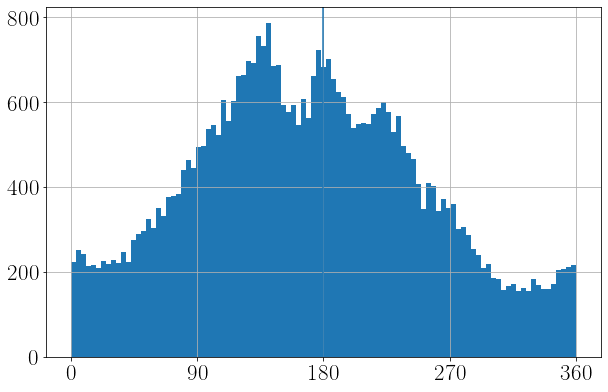

In [124]:
epgExpInbFD.phi2.hist(bins = 101)
plt.xticks([0, 90, 180, 270, 360])
plt.axvline(180)

In [126]:
df_global = countDF(epgExpInb, df_global, "epgExpInb")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [66]:
sum(df_global.epgExpInb1) + sum(df_global.epgExpInb2) + sum(df_global.epgExpInb3)

229034

In [67]:
def visualize(df_global, Q2xBtbin, config = 1, colName = "new", title = "", sub = None, scale = 'linear', errorbar = True):
    if not Q2xBtbin in goodBins:
        print("invalid bin number.")
        return False
    df = df_global.loc[df_global.Q2xBt==Q2xBtbin]
    bins_i = df.phi_i.to_numpy()
    bins_f = df.phi_f.to_numpy()
    bins_i = np.insert(bins_i, 0, 0)
    bins_i = np.insert(bins_i, len(bins_i), bins_f[-1])
    bins_f = np.insert(bins_f, 0, bins_i[1])
    bins_f = np.insert(bins_f, len(bins_f), 360)
    bincenters = np.array([0.5 * (bins_i[i] + bins_f[i]) for i in range(len(bins_i))])
    if config in [1, 2, 3]:
        entries = df.loc[:, colName+str(config)].to_numpy()
    elif config == "all":
        entries1 = df.loc[:, colName+"1"].to_numpy()
        entries2 = df.loc[:, colName+"2"].to_numpy()
        entries3 = df.loc[:, colName+"3"].to_numpy()
        entries = entries1 + entries2 + entries3
    print(entries)
    entries = np.insert(entries, 0, 0)
    entries = np.insert(entries, len(entries), 0)
    print(entries)
    plt.step(bincenters, entries, where = 'mid', color = 'k')
    if errorbar:
        plt.errorbar(bincenters, entries, yerr = np.sqrt(entries), color = 'k', linestyle = '')
    if config == "all":
        entries1 = np.insert(entries1, 0, 0)
        entries1 = np.insert(entries1, len(entries1), 0)
        entries2 = np.insert(entries2, 0, 0)
        entries2 = np.insert(entries2, len(entries2), 0)
        entries3 = np.insert(entries3, 0, 0)
        entries3 = np.insert(entries3, len(entries3), 0)
        if sub:
            plt.step(bincenters, entries1, where = 'mid', color = 'r')
            plt.step(bincenters, entries2, where = 'mid', color = 'g')
            plt.step(bincenters, entries3, where = 'mid', color = 'b')
    plt.xlim([0, 360])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    if title:
        plt.title(title)
    else:
        plt.title(colName + str(config) + "\t" + str(Q2xBtbin))
    if scale == 'log':
        plt.yscale('log')
        plt.ylim([0.005, 1])
    plt.show()

[119 137 127  87 112 148 161 161 160 161 161 160 161 161 160 161 161 161
  43  98 122 133  85  86]
[  0 119 137 127  87 112 148 161 161 160 161 161 160 161 161 160 161 161
 161  43  98 122 133  85  86   0]


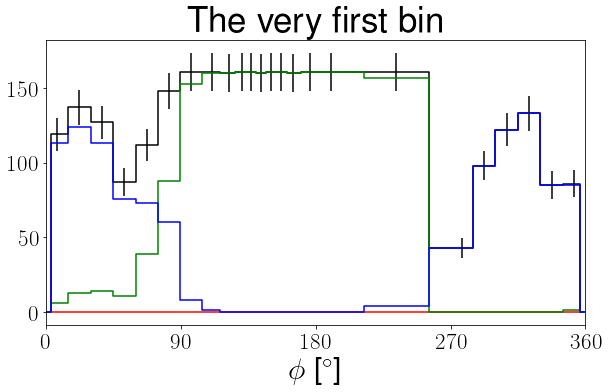

In [127]:
visualize(df_global, 111, config = "all", sub = True, colName = "epgExpInb", title= "The very first bin")

In [69]:
parent_MC = "/Volumes/Extreme SSD/Jan2022/convPkl/dvcs/"
parent_bhMC = "/Volumes/Extreme SSD/Jan2022/convPkl/bh/"
parent_Gen = "/Volumes/Extreme SSD/nov2021/convPkl_Gen/dvcs/inb/"
parent_bhGen = "/Volumes/Extreme SSD/nov2021/convPkl_Gen/bh/inb/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl/exp/"

# #dvcsGen
df_3987_Gen = pd.read_pickle(parent_Gen + "3987.pkl")
df_4124_Gen = pd.read_pickle(parent_Gen + "4124.pkl")
df_4139_Gen = pd.read_pickle(parent_Gen + "4139.pkl")
df_4181_Gen = pd.read_pickle(parent_Gen + "4181.pkl")
df_4182_Gen = pd.read_pickle(parent_Gen + "4182.pkl")

# #bhGen
df_4238_Gen = pd.read_pickle(parent_bhGen + "4238.pkl")

#dvcs Rec
df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4124_corr = pd.read_pickle(parent_MC + "4124.pkl")
df_4139_corr = pd.read_pickle(parent_MC + "4139.pkl")
df_4181_corr = pd.read_pickle(parent_MC + "4181.pkl")
df_4182_corr = pd.read_pickle(parent_MC + "4182.pkl")

#bh Rec
df_4238_corr = pd.read_pickle(parent_bhMC + "4238.pkl")

#bkg1g Rec
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4202_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4202.pkl")
df_4209_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4209.pkl")
#bkg2g Rec
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
df_4202_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4202.pkl")
df_4209_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4209.pkl")
#bkg2g Exp
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [70]:
def numberingGenDF(total, Q2bin_i=Q2bin_i, Q2bin_f=Q2bin_f, xBbin_i=xBbin_i, xBbin_f=xBbin_f, tbin_i=tbin_i, tbin_f=tbin_f, goodBins=goodBins, badBins=badBins, df_global=df_global):
    df_allBins = {}
    Q2xBtphi = 0

    for Q2bin in range(0, len(Q2bin_i)):#Q2 bin
        for xBbin in range(0, len(xBbin_i[Q2bin+1])):
            for tbin in range(0, len(tbin_i)):
                local = total
                Q2_i = Q2bin_i[Q2bin]
                Q2_f = Q2bin_f[Q2bin]
                xB_i = xBbin_i[Q2bin+1][xBbin]
                xB_f = xBbin_f[Q2bin+1][xBbin]
                t_i = tbin_i[tbin]
                t_f = tbin_f[tbin]
                #cut by Q2
                if Q2bin == len(Q2bin_i)-1:
                    local = local.loc[(local.GenQ2>=Q2_i) & (local.GenQ2<=Q2_f)]
                else:
                    local = local.loc[(local.GenQ2>=Q2_i) & (local.GenQ2<Q2_f)]
                #cut by xB
                #xB lower bound
                if xBbin == 0:
                    local = local.loc[local.GenQ2<=2*M*(10.604-2)*local.GenxB, :]
                else:
                    local = local.loc[local.GenxB>=xB_i] 
                #xB upper bound
                if (xBbin == len(xBbin_i[Q2bin+1])-1) & (Q2bin < 2):
                    local = local.loc[local.GenQ2>=2*M*3*local.GenxB]
                elif (xBbin == len(xBbin_i[Q2bin+1])-1) & (Q2bin < 4):
                    local = local.loc[local.GenQ2>=(4 - M*M)*local.GenxB/(1 - local.GenxB)]
                else:
                    local = local.loc[local.GenxB<xB_f]
                #cut by t
                if tbin == len(tbin_i)-1:
                    local = local.loc[(local.Gent2>=t_i) & (local.Gent2<=t_f)]
                else:
                    local = local.loc[(local.Gent2>=t_i) & (local.Gent2<t_f)]
                Q2xBtbin = 100*(Q2bin+1) + 10*(xBbin+1) + (tbin+1)
                
                if Q2xBtbin in badBins:
                    continue

                phibin_i = df_global.loc[(df_global.Q2xBt == Q2xBtbin), "phi_i"].to_numpy()
                phibin_f = df_global.loc[(df_global.Q2xBt == Q2xBtbin), "phi_f"].to_numpy()
                phibin_f[-1] = 360
                for phi_ind in range(0, len(phibin_i)):
                    local.loc[:, "GenxBbin"] = xBbin
                    local.loc[:, "GenQ2bin"] = Q2bin
                    local.loc[:, "Gentbin"] = tbin
                    local.loc[:, "Genphibin"] = phi_ind
                    local.loc[:, "GenQ2xBtbin"] = Q2xBtbin
                    local.loc[:, "GenQ2xBtphi"] = Q2xBtphi
                    df_allBins[Q2xBtphi] = local.loc[(local.Genphi2>=phibin_i[phi_ind])&(local.Genphi2<phibin_f[phi_ind])]
                    Q2xBtphi += 1

    total = pd.concat(df_allBins.values()).sort_values( by = 'event')
    return total

In [71]:
df_3987_corr = numberingDF(df_3987_corr)
gen = numberingGenDF(df_3987_corr)
df_3987_corr.loc[(df_3987_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [72]:
df_4124_corr = numberingDF(df_4124_corr)
gen = numberingGenDF(df_4124_corr)
df_4124_corr.loc[(df_4124_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:,  ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [73]:
df_4139_corr = numberingDF(df_4139_corr)
gen = numberingGenDF(df_4139_corr)
df_4139_corr.loc[(df_4139_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [74]:
df_4181_corr = numberingDF(df_4181_corr)
gen = numberingGenDF(df_4181_corr)
df_4181_corr.loc[(df_4181_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [75]:
df_4182_corr = numberingDF(df_4182_corr)
gen = numberingGenDF(df_4182_corr)
df_4182_corr.loc[(df_4182_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [76]:
dvcsSimInb = pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])

In [55]:
purity_Q2 = []
for i in df_global.Q2.unique():
#     if i%100 == 0:
    print(i)
    purity_Q2.append(sum((dvcsSimInb.GenQ2bin==i-1) & (dvcsSimInb.Q2bin==i-1))/sum(dvcsSimInb.Q2bin == i-1))

1
2
3
4
5
6


In [56]:
purity_xB = []
for i in df_global.xB.unique():
#     if i%100 == 0:
    print(i)
    purity_xB.append(sum((dvcsSimInb.GenxBbin==i-1) & (dvcsSimInb.xBbin==i-1))/sum(dvcsSimInb.xBbin == i-1))

1
2
3
4


In [58]:
purity_t = []
for i in df_global.xB.unique():
#     if i%100 == 0:
    print(i)
    purity_t.append(sum((dvcsSimInb.Gentbin==i-1) & (dvcsSimInb.tbin==i-1))/sum(dvcsSimInb.tbin == i-1))

1
2
3
4


In [77]:
bins_Q2xBt = []
purity_Q2xBt = []
for i in df_global.Q2xBt.unique():
#     if i%100 == 0:
#         print(i)
    bins_Q2xBt.append(i)
    purity_Q2xBt.append(sum((dvcsSimInb.GenQ2xBtbin==i) & (dvcsSimInb.Q2xBtbin==i))/sum(dvcsSimInb.Q2xBtbin == i))

In [94]:
np.array([bins_Q2xBt, purity_Q2xBt]).T

array([[1.11000000e+02, 8.68188292e-01],
       [1.12000000e+02, 8.32762908e-01],
       [1.13000000e+02, 8.27581569e-01],
       [1.14000000e+02, 8.58106183e-01],
       [1.21000000e+02, 8.54534388e-01],
       [1.22000000e+02, 8.71106189e-01],
       [1.23000000e+02, 8.44032445e-01],
       [1.24000000e+02, 8.59640103e-01],
       [1.31000000e+02, 8.27882308e-01],
       [1.32000000e+02, 8.98306506e-01],
       [1.33000000e+02, 8.92719968e-01],
       [1.34000000e+02, 8.73640024e-01],
       [2.11000000e+02, 8.27911643e-01],
       [2.12000000e+02, 8.35450183e-01],
       [2.13000000e+02, 8.22963801e-01],
       [2.14000000e+02, 8.57867688e-01],
       [2.21000000e+02, 7.57501326e-01],
       [2.22000000e+02, 8.32647335e-01],
       [2.23000000e+02, 8.35512841e-01],
       [2.24000000e+02, 8.86596678e-01],
       [2.31000000e+02, 7.93233858e-01],
       [2.32000000e+02, 8.76844795e-01],
       [2.33000000e+02, 8.67234457e-01],
       [2.34000000e+02, 8.58790646e-01],
       [2.420000

In [80]:
len(df_global.Q2xBt.unique())

55

In [84]:
df_global.loc[df_global.Q2xBt == 512, ["epgExpInb1", "epgExpInb2", "epgExpInb3"]]

,epgExpInb1,epgExpInb2,epgExpInb3
1176,50,16,30
1177,44,16,13
1178,50,16,2
1179,57,5,0
1180,76,8,0
1181,52,4,0
1182,19,4,0
1183,22,0,0
1184,22,0,0
1185,22,0,0


<AxesSubplot:>

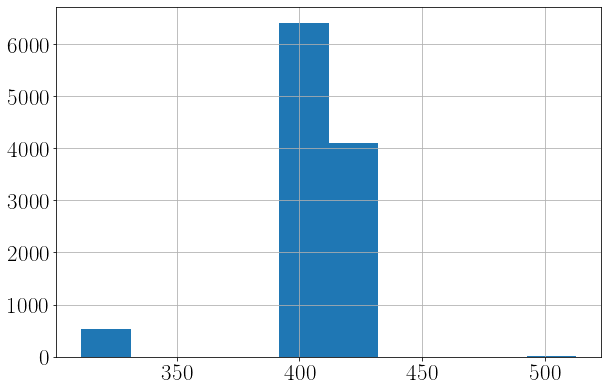

In [91]:
dvcsSimInb.loc[dvcsSimInb.Q2xBtbin == 411, ["Q2xBtbin", "GenQ2xBtbin"]].GenQ2xBtbin.hist()

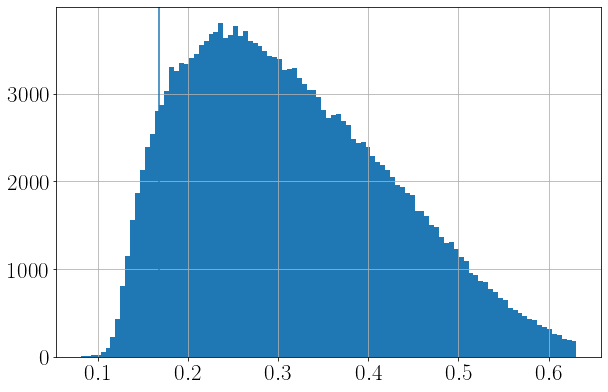

In [110]:
dvcsSimInb.loc[(dvcsSimInb.Q2bin == 3) & (dvcsSimInb.xBbin == 0)].t2.hist(bins = 101)
plt.axvline(10**(-0.775))

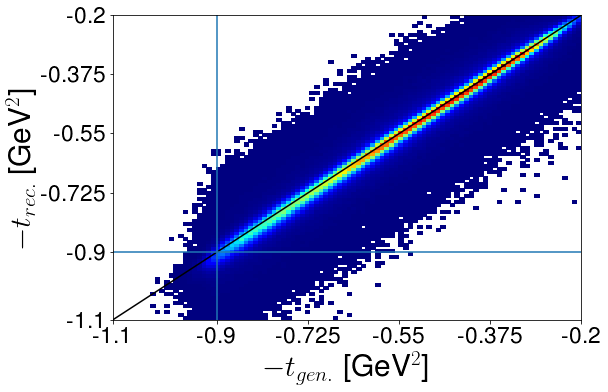

In [112]:
plt.hist2d(np.log10(dvcsSimInb.Gent2), np.log10(dvcsSimInb.t2), cmin =1, cmap = cmap, bins = np.linspace(-1.1, -0.2, 101))
plt.plot(np.linspace(-1.1, 0.8, 101), np.linspace(-1.1, 0.8, 101), color = 'k')
plt.axvline(-0.9)
plt.axhline(-0.9)
plt.xticks([-1.1, -0.9, -0.725, -0.55, -0.375, -0.2], [-1.1, -0.9, -0.725, -0.55, -0.375, -0.2])
plt.yticks([-1.1, -0.9, -0.725, -0.55, -0.375, -0.2], [-1.1, -0.9, -0.725, -0.55, -0.375, -0.2])
plt.xlabel(r"$-t_{gen.}$"+" ["+GeV2+"]")
plt.ylabel(r"$-t_{rec.}$"+" ["+GeV2+"]")
plt.show()

In [ ]:
plt.hist2d(np.log10(dvcsSimInb.GenxB), np.log10(dvcsSimInb.xB), cmin =1, cmap = cmap, bins = np.linspace(-1.1, -0.2, 101))
plt.plot(np.linspace(-1.1, 0.8, 101), np.linspace(-1.1, 0.8, 101), color = 'k')
plt.axvline(-0.9)
plt.axhline(-0.9)
plt.xticks([-1.1, -0.9, -0.725, -0.55, -0.375, -0.2], [-1.1, -0.9, -0.725, -0.55, -0.375, -0.2])
plt.yticks([-1.1, -0.9, -0.725, -0.55, -0.375, -0.2], [-1.1, -0.9, -0.725, -0.55, -0.375, -0.2])
plt.xlabel(r"$-t_{gen.}$"+" ["+GeV2+"]")
plt.ylabel(r"$-t_{rec.}$"+" ["+GeV2+"]")
plt.show()

In [ ]:
df_4238_corr = numberingDF(df_4238_corr)
gen = numberingGenDF(df_4238_corr)
df_4238_corr.loc[(df_4238_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [37]:
df_4076_1g_corr = numberingDF(df_4076_1g_corr)
df_4202_1g_corr = numberingDF(df_4202_1g_corr)
df_4209_1g_corr = numberingDF(df_4209_1g_corr)

In [38]:
df_4076_2g_corr = numberingDF(df_4076_2g_corr)
df_4202_2g_corr = numberingDF(df_4202_2g_corr)
df_4209_2g_corr = numberingDF(df_4209_2g_corr)

In [39]:
exp_2g_corr = numberingDF(exp_2g_corr)

In [57]:
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])
bhSimInb = df_4238_corr

In [58]:
df_global = countDF(pi0ExpInb, df_global, "pi0ExpInb")
df_global = countDF(dvcsSimInb, df_global, "dvcsSimInb")
df_global = countDF(bkgSimInb, df_global, "bkgSimInb")
df_global = countDF(pi0SimInb, df_global, "pi0SimInb")
df_global = countDF(bhSimInb, df_global, "bhSimInb")

0
100
200
300
400
500
600
700
800
900
1000
1100
0
100
200
300
400
500
600
700
800
900
1000
1100
0
100
200
300
400
500
600
700
800
900
1000
1100
0
100
200
300
400
500
600
700
800
900
1000
1100
0
100
200
300
400
500
600
700
800
900
1000
1100


In [138]:
df_global

,phi_i,phi_f,phi,xB_i,xB_f,xB,Q2_i,Q2_f,Q2,t_i,...,epgExpInb2_phiIntegrated,epgExpInb3_phiIntegrated,bkgSimInb1_phiIntegrated,bkgSimInb2_phiIntegrated,bkgSimInb3_phiIntegrated,cont1,cont2,cont3,dvcsGenInb,bhGenInb
0,0.153444,19.166295,0,0.090178,0.155458,1,1.456000,1.911685,1,0.079433,...,2212,1177,0,791,30,NaN,0.023434,0.003398,861165,204564
1,19.166295,36.275548,1,0.090178,0.155458,1,1.456000,1.911685,1,0.079433,...,2212,1177,0,791,30,NaN,0.023434,0.003398,583419,134440
2,36.275548,59.295052,2,0.090178,0.155458,1,1.456000,1.911685,1,0.079433,...,2212,1177,0,791,30,NaN,0.023434,0.003398,522596,114479
3,59.295052,80.054254,3,0.090178,0.155458,1,1.456000,1.911685,1,0.079433,...,2212,1177,0,791,30,NaN,0.023434,0.003398,308994,61780
4,80.054254,94.707928,4,0.090178,0.155458,1,1.456000,1.911685,1,0.079433,...,2212,1177,0,791,30,NaN,0.023434,0.003398,164160,30061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,267.323913,286.446403,16,0.386765,0.558343,1,6.244623,9.014892,6,0.398107,...,2,0,924,0,0,0.093994,0.000000,NaN,8217,1777
1151,286.446403,302.899788,17,0.386765,0.558343,1,6.244623,9.014892,6,0.398107,...,2,0,924,0,0,0.093994,0.000000,NaN,8106,1727
1152,302.899788,321.882768,18,0.386765,0.558343,1,6.244623,9.014892,6,0.398107,...,2,0,924,0,0,0.093994,0.000000,NaN,10749,2449
1153,321.882768,346.262950,19,0.386765,0.558343,1,6.244623,9.014892,6,0.398107,...,2,0,924,0,0,0.093994,0.000000,NaN,15585,3889


In [127]:
text = ""
for i in range(0, len(df_global)):
    text += "./dvcsgen --x "+str(((df_global.xB_i+df_global.xB_f)/2).values[i]) + "  " + str(((df_global.xB_i+df_global.xB_f)/2).values[i]) +"  --q2 " +str(((df_global.Q2_i+df_global.Q2_f)/2).values[i]) + "\t" + str(((df_global.Q2_i+df_global.Q2_f)/2).values[i]) +  "  --t "+str(((df_global.t_i+df_global.t_f)/2).values[i]) + "\t" + str(((df_global.t_i+df_global.t_f)/2).values[i]) + "  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi " + str(((df_global.phi_i+df_global.phi_f)/2).values[i]*np.pi/180.0) +"| grep averaged \n"

In [130]:
print(text)

./dvcsgen --x 0.12281802172376398  0.12281802172376398  --q2 1.6838426973985845	1.6838426973985845  --t 0.11896107135926974	0.11896107135926974  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.16859652714497314| grep averaged 
./dvcsgen --x 0.12281802172376398  0.12281802172376398  --q2 1.6838426973985845	1.6838426973985845  --t 0.11896107135926974	0.11896107135926974  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.48382134924468007| grep averaged 
./dvcsgen --x 0.12281802172376398  0.12281802172376398  --q2 1.6838426973985845	1.6838426973985845  --t 0.11896107135926974	0.11896107135926974  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.8340108202654877| grep averaged 
./dvcsgen --x 0.12281802172376398  0.12281802172376398  --q2 1.6838426973985845	1.6838426973985845  --t 0.11896107135926974	0.11896107135926974  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 1.2160521031507256| grep averaged 
./dvcsgen --x 0.12281802172376398  0.12281

In [69]:
df_globalGen = pd.read_pickle("../df_global3.pkl")
df_global = pd.read_pickle("../df_global2.pkl")

In [136]:
df_global = df_global.merge(df_globalGen, how = 'outer')

In [137]:
df_global.to_pickle("../df_global2.pkl")

In [94]:
df_global.to_pickle("/Users/sangbaek/CLAS12/df_global2.pkl")
dvcsSimInb.loc[:, ["Q2xBtphi",  "GenQ2xBtphi"]].to_pickle("/Users/sangbaek/clas12/binMigrationInb2.pkl")

In [84]:
df_global.loc[:, "pi0SimInb1_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "pi0SimInb1_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "pi0SimInb1"])

df_global.loc[:, "pi0SimInb2_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "pi0SimInb2_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "pi0SimInb2"])

df_global.loc[:, "pi0SimInb3_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "pi0SimInb3_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "pi0SimInb3"])

df_global.loc[:, "pi0ExpInb1_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "pi0ExpInb1_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "pi0ExpInb1"])

df_global.loc[:, "pi0ExpInb2_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "pi0ExpInb2_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "pi0ExpInb2"])

df_global.loc[:, "pi0ExpInb3_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "pi0ExpInb3_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "pi0ExpInb3"])
    
df_global.loc[:, "epgExpInb1_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "epgExpInb1_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "epgExpInb1"])

df_global.loc[:, "epgExpInb2_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "epgExpInb2_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "epgExpInb2"])

df_global.loc[:, "epgExpInb3_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "epgExpInb3_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "epgExpInb3"])

df_global.loc[:, "bkgSimInb1_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "bkgSimInb1_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "bkgSimInb1"])

df_global.loc[:, "bkgSimInb2_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "bkgSimInb2_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "bkgSimInb2"])

df_global.loc[:, "bkgSimInb3_phiIntegrated"] = 0
for Q2xBt in df_global.Q2xBt:
    df_global.loc[df_global.Q2xBt == Q2xBt, "bkgSimInb3_phiIntegrated"] = sum(df_global.loc[df_global.Q2xBt == Q2xBt, "bkgSimInb3"])

Text(0, 0.5, 'pi0 Exp/Sim')

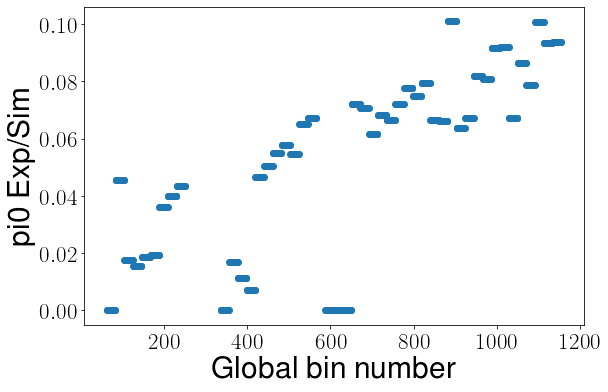

In [86]:
plt.scatter(df_global.index, df_global.pi0ExpInb1/df_global.pi0SimInb1)
plt.scatter(df_global.index, df_global.pi0ExpInb1_phiIntegrated/df_global.pi0SimInb1_phiIntegrated)
plt.xlabel("Global bin number")
plt.ylabel("pi0 Exp/Sim")

In [90]:
df_global.loc[:, "cont1"] = df_global.bkgSimInb1_phiIntegrated*df_global.pi0ExpInb1_phiIntegrated/df_global.pi0SimInb1_phiIntegrated/df_global.epgExpInb1_phiIntegrated
df_global.loc[:, "cont2"] = df_global.bkgSimInb2_phiIntegrated*df_global.pi0ExpInb2_phiIntegrated/df_global.pi0SimInb2_phiIntegrated/df_global.epgExpInb2_phiIntegrated
df_global.loc[:, "cont3"] = df_global.bkgSimInb3_phiIntegrated*df_global.pi0ExpInb3_phiIntegrated/df_global.pi0SimInb3_phiIntegrated/df_global.epgExpInb3_phiIntegrated

Text(0, 0.5, 'Contamination ratio')

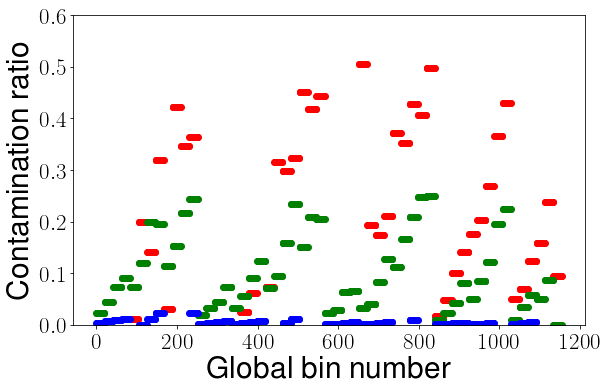

In [89]:
# plt.scatter(df_global.index, df_global.pi0ExpInb1/df_global.pi0SimInb1)
plt.scatter(df_global.index, df_global.bkgSimInb1_phiIntegrated*df_global.pi0ExpInb1_phiIntegrated/df_global.pi0SimInb1_phiIntegrated/df_global.epgExpInb1_phiIntegrated, color = 'r')
plt.scatter(df_global.index, df_global.bkgSimInb2_phiIntegrated*df_global.pi0ExpInb2_phiIntegrated/df_global.pi0SimInb2_phiIntegrated/df_global.epgExpInb2_phiIntegrated, color = 'g')
plt.scatter(df_global.index, df_global.bkgSimInb3_phiIntegrated*df_global.pi0ExpInb3_phiIntegrated/df_global.pi0SimInb3_phiIntegrated/df_global.epgExpInb3_phiIntegrated, color = 'b')
plt.ylim([0, 0.6])
plt.xlabel("Global bin number")
plt.ylabel("Contamination ratio")

In [169]:
df_global.loc[:, "cont1stat"] = np.sqrt(1/df_global.bkgSimInb1_phiIntegrated + 1/df_global.pi0SimInb1_phiIntegrated + 1/df_global.pi0ExpInb1_phiIntegrated + 1/df_global.epgExpInb1_phiIntegrated)
df_global.loc[:, "cont2stat"] = np.sqrt(1/df_global.bkgSimInb2_phiIntegrated + 1/df_global.pi0SimInb2_phiIntegrated + 1/df_global.pi0ExpInb2_phiIntegrated + 1/df_global.epgExpInb2_phiIntegrated)
df_global.loc[:, "cont3stat"] = np.sqrt(1/df_global.bkgSimInb3_phiIntegrated + 1/df_global.pi0SimInb3_phiIntegrated + 1/df_global.pi0ExpInb3_phiIntegrated + 1/df_global.epgExpInb3_phiIntegrated)

In [141]:
df_global.loc[:, "dvcsExpInb1"] = df_global.epgExpInb1 * (1-df_global.cont1)
df_global.loc[:, "dvcsExpInb2"] = df_global.epgExpInb2 * (1-df_global.cont2)
df_global.loc[:, "dvcsExpInb3"] = df_global.epgExpInb3 * (1-df_global.cont3)

In [170]:
df_global.loc[:, "dvcs1stat"] = np.sqrt(1/df_global.epgExpInb1 + 1/df_global.epgExpInb1*df_global.cont1stat**2)
df_global.loc[:, "dvcs2stat"] = np.sqrt(1/df_global.epgExpInb2 + 1/df_global.epgExpInb2*df_global.cont2stat**2)
df_global.loc[:, "dvcs3stat"] = np.sqrt(1/df_global.epgExpInb3 + 1/df_global.epgExpInb3*df_global.cont3stat**2)

In [ ]:
df_global.loc[:, "dvcs1stat"] = np.sqrt(1/df_global.epgExpInb1 + 1/df_global.epgExpInb1*df_global.cont1stat**2)
df_global.loc[:, "dvcs2stat"] = np.sqrt(1/df_global.epgExpInb2 + 1/df_global.epgExpInb2*df_global.cont2stat**2)
df_global.loc[:, "dvcs3stat"] = np.sqrt(1/df_global.epgExpInb3 + 1/df_global.epgExpInb3*df_global.cont3stat**2)

In [144]:
df_global.loc[:, "dvcsAcc1"] = df_global.dvcsSimInb1 /df_global.dvcsGenInb
df_global.loc[:, "dvcsAcc2"] = df_global.dvcsSimInb2 /df_global.dvcsGenInb
df_global.loc[:, "dvcsAcc3"] = df_global.dvcsSimInb3 /df_global.dvcsGenInb

In [171]:
df_global.loc[:, "dvcsAcc1stat"] = np.sqrt(1/df_global.dvcsSimInb1 + 1/df_global.dvcsGenInb)
df_global.loc[:, "dvcsAcc2stat"] = np.sqrt(1/df_global.dvcsSimInb2 + 1/df_global.dvcsGenInb)
df_global.loc[:, "dvcsAcc3stat"] = np.sqrt(1/df_global.dvcsSimInb3 + 1/df_global.dvcsGenInb)

In [172]:
df_global.loc[:, "bhAcc1stat"] = np.sqrt(1/df_global.bhSimInb1 + 1/df_global.bhGenInb)
df_global.loc[:, "bhAcc2stat"] = np.sqrt(1/df_global.bhSimInb2 + 1/df_global.bhGenInb)
df_global.loc[:, "bhAcc3stat"] = np.sqrt(1/df_global.bhSimInb3 + 1/df_global.bhGenInb)

In [224]:
df_global.loc[:, "dvcsXsec1"] = df_global.dvcsExpInb1/df_global.dvcsAcc1/df_global.binVol/56.5/(np.pi/180)/(df_global.phi_f-df_global.phi_i)/10**6/Frad
df_global.loc[:, "dvcsXsec2"] = df_global.dvcsExpInb2/df_global.dvcsAcc2/df_global.binVol/56.5/(np.pi/180)/(df_global.phi_f-df_global.phi_i)/10**6/Frad
df_global.loc[:, "dvcsXsec3"] = df_global.dvcsExpInb3/df_global.dvcsAcc3/df_global.binVol/56.5/(np.pi/180)/(df_global.phi_f-df_global.phi_i)/10**6/Frad

In [225]:
df_global.loc[:, "dvcsBHXsec1"] = df_global.dvcsExpInb1/df_global.bhAcc1/df_global.binVol/56.5/(np.pi/180)/(df_global.phi_f-df_global.phi_i)/10**6/Frad
df_global.loc[:, "dvcsBHXsec2"] = df_global.dvcsExpInb2/df_global.bhAcc2/df_global.binVol/56.5/(np.pi/180)/(df_global.phi_f-df_global.phi_i)/10**6/Frad
df_global.loc[:, "dvcsBHXsec3"] = df_global.dvcsExpInb3/df_global.bhAcc3/df_global.binVol/56.5/(np.pi/180)/(df_global.phi_f-df_global.phi_i)/10**6/Frad

In [ ]:
Frad = 
Frad = np.array(Frad)

In [238]:
len(df_global)

1155

In [228]:
df_global.loc[np.isnan(df_global.dvcsXsec1), "dvcsXsec1"] = 0
df_global.loc[np.isnan(df_global.dvcsXsec2), "dvcsXsec2"] = 0
df_global.loc[np.isnan(df_global.dvcsXsec3), "dvcsXsec3"] = 0
df_global.loc[np.isnan(df_global.dvcsBHXsec1), "dvcsBHXsec1"] = 0
df_global.loc[np.isnan(df_global.dvcsBHXsec2), "dvcsBHXsec2"] = 0
df_global.loc[np.isnan(df_global.dvcsBHXsec3), "dvcsBHXsec3"] = 0

In [229]:
df_global.dvcsXsec3

0       4.586477
1       2.907350
2       1.666046
3       1.165837
4       1.189687
          ...   
1150    0.000000
1151    0.000000
1152    0.000000
1153    0.000000
1154    0.000000
Name: dvcsXsec3, Length: 1155, dtype: float64

In [239]:
def visualizeXsec(df_global, Q2xBtbin, config = 1, colName = "new", title = "", sub = None, scale = 'linear', errorbar = True):
    if not Q2xBtbin in goodBins:
        print("invalid bin number.")
        return False
    df = df_global.loc[df_global.Q2xBt==Q2xBtbin]
    bins_i = df.phi_i.to_numpy()
    bins_f = df.phi_f.to_numpy()
    bins_i = np.insert(bins_i, 0, 0)
    bins_i = np.insert(bins_i, len(bins_i), bins_f[-1])
    bins_f = np.insert(bins_f, 0, bins_i[1])
    bins_f = np.insert(bins_f, len(bins_f), 360)
    bincenters = np.array([0.5 * (bins_i[i] + bins_f[i]) for i in range(len(bins_i))])
    if config in [1, 2, 3]:
        entries = df.loc[:, colName+str(config)].to_numpy()
    elif config == "all":
        entries1 = df.loc[:, colName+"1"].to_numpy()
        entries2 = df.loc[:, colName+"2"].to_numpy()
        entries3 = df.loc[:, colName+"3"].to_numpy()
        entries = entries1 + entries2 + entries3
    print(entries)
    entries = np.insert(entries, 0, 0)
    entries = np.insert(entries, len(entries), 0)
    print(entries)
#     plt.step(bincenters, entries, where = 'mid', color = 'k')
#     if errorbar:
#         plt.errorbar(bincenters, entries, yerr = np.sqrt(entries), color = 'k', linestyle = '')
    if config == "all":
        entries1 = np.insert(entries1, 0, 0)
        entries1 = np.insert(entries1, len(entries1), 0)
        entries2 = np.insert(entries2, 0, 0)
        entries2 = np.insert(entries2, len(entries2), 0)
        entries3 = np.insert(entries3, 0, 0)
        entries3 = np.insert(entries3, len(entries3), 0)
        if sub:
            plt.step(bincenters, entries1, where = 'mid', color = 'r')
            plt.step(bincenters, entries2, where = 'mid', color = 'g')
            plt.step(bincenters, entries3, where = 'mid', color = 'b')
    plt.xlim([0, 360])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    if title:
        plt.title(title)
    else:
        plt.title(colName + str(config) + "\t" + str(Q2xBtbin))
    if scale == 'log':
        plt.yscale('log')
        plt.ylim([0.005, 1])
    plt.show()

[0.08971838 0.09293373 0.09955938 0.07719856 0.07808866 0.07794235
 0.07506726 0.06087347        inf 0.0422827  0.03921014 0.11381808
 0.06217112 0.04925586 0.03952359 0.14568339 0.06276138 0.07577158
 0.0817962  0.08513757 0.08913976]
[0.         0.08971838 0.09293373 0.09955938 0.07719856 0.07808866
 0.07794235 0.07506726 0.06087347        inf 0.0422827  0.03921014
 0.11381808 0.06217112 0.04925586 0.03952359 0.14568339 0.06276138
 0.07577158 0.0817962  0.08513757 0.08913976 0.        ]


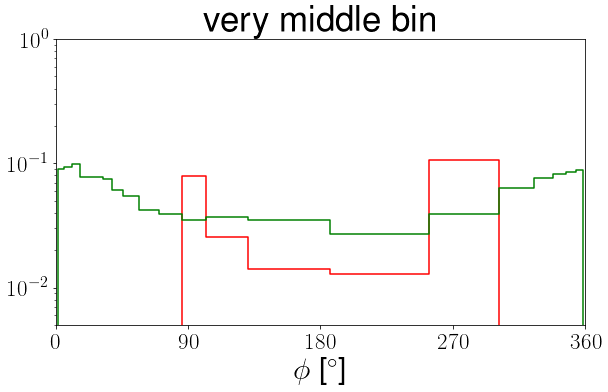

In [243]:
visualizeXsec(df_global, 232, config = "all", colName = "dvcsXsec", title = "very middle bin", sub = True, scale = 'log', errorbar = None)

In [17]:
binMigrationInb = pd.read_pickle("/Users/sangbaek/clas12/binMigrationInb.pkl")
# binMigrationInb = dvcsSimInb.loc[:, ["Q2xBtphi",  "GenQ2xBtphi"]]

In [29]:
purity = []
for i in range(0, len(df_global)):
    if i%100 == 0:
        print(i)
    purity.append(sum((dvcsSimInb.GenQ2xBtphi==i) & (dvcsSimInb.Q2xBtphi==i))/sum(dvcsSimInb.Q2xBtphi == i))

0
100
200
300
400
500
600
700
800
900
1000
1100


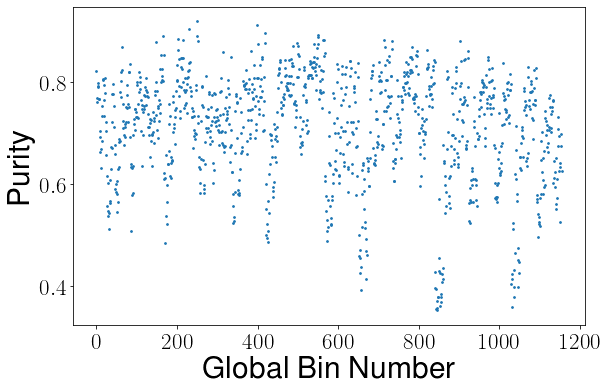

In [34]:
plt.scatter(np.linspace(0, len(purity)-1, len(purity)), purity, marker = 'o', s=3)
plt.xlabel("Global Bin Number")
plt.ylabel("Purity")
plt.show()

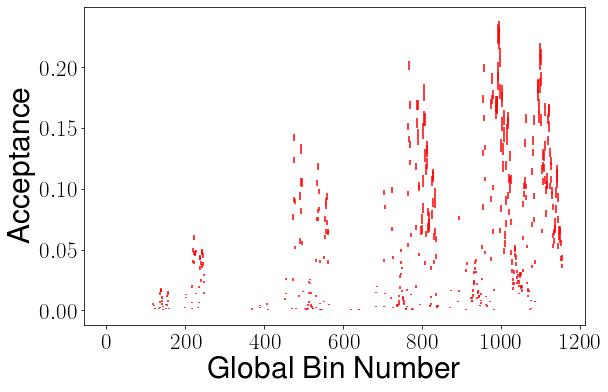

In [181]:
plt.errorbar(np.linspace(0, len(purity)-1, len(purity)), df_global.dvcsAcc1, yerr = df_global['dvcsAcc1stat']*df_global.dvcsAcc1, linestyle = '', markersize =0.5, color = 'r')
plt.xlabel("Global Bin Number")
plt.ylabel("Acceptance")
plt.show()

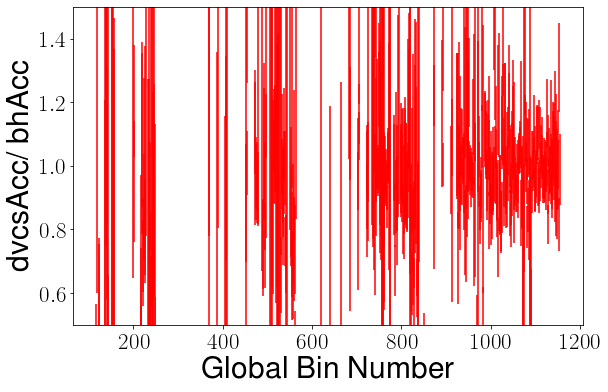

In [180]:
plt.errorbar(np.linspace(0, len(purity)-1, len(purity)), df_global.dvcsAcc1/df_global.bhAcc1, yerr = np.sqrt(df_global['dvcsAcc1stat']**2+df_global['bhAcc1stat']**2)*df_global.dvcsAcc1/df_global.bhAcc1, linestyle = '', markersize =0.5, color = 'r')
plt.xlabel("Global Bin Number")
plt.ylabel("dvcsAcc/ bhAcc")
plt.xlabel("Global Bin Number")
plt.ylabel("dvcsAcc/ bhAcc")
plt.ylim([0.5, 1.5])
plt.show()

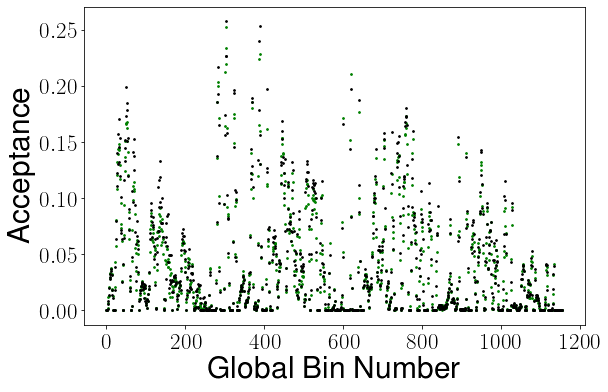

In [150]:
plt.scatter(np.linspace(0, len(purity)-1, len(purity)), df_global.dvcsAcc2, marker = 'o', s=3, color = 'g')
# plt.scatter(np.linspace(0, len(purity)-1, len(purity)), df_global.bhAcc2, marker = 'o', s=3, color = 'k')
plt.xlabel("Global Bin Number")
plt.ylabel("Acceptance")
plt.show()

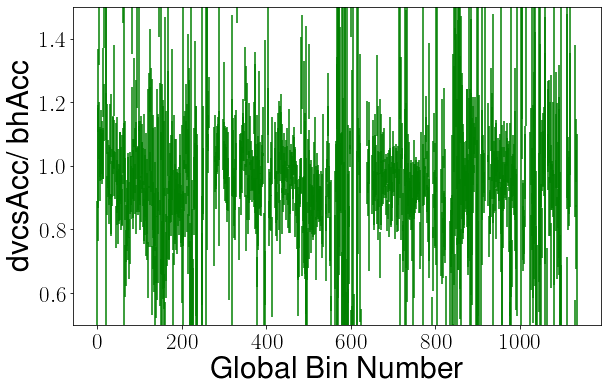

In [182]:
plt.errorbar(np.linspace(0, len(purity)-1, len(purity)), df_global.dvcsAcc2/df_global.bhAcc2, yerr = np.sqrt(df_global['dvcsAcc2stat']**2+df_global['bhAcc2stat']**2)*df_global.dvcsAcc2/df_global.bhAcc2, linestyle = '', markersize =0.5, color = 'g')
plt.xlabel("Global Bin Number")
plt.ylabel("dvcsAcc/ bhAcc")
plt.xlabel("Global Bin Number")
plt.ylabel("dvcsAcc/ bhAcc")
plt.ylim([0.5, 1.5])
plt.show()

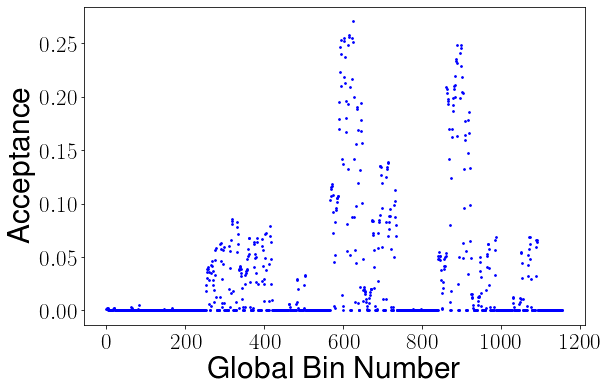

In [158]:
plt.scatter(np.linspace(0, len(purity)-1, len(purity)), df_global.dvcsAcc3, marker = 'o', s=3, color = 'b')
plt.xlabel("Global Bin Number")
plt.ylabel("Acceptance")
plt.show()

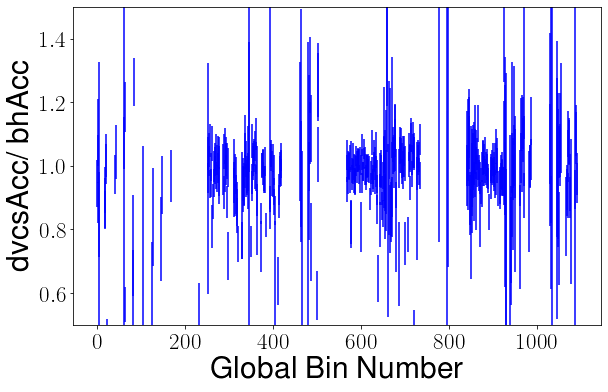

In [183]:
plt.errorbar(np.linspace(0, len(purity)-1, len(purity)), df_global.dvcsAcc3/df_global.bhAcc3, yerr = np.sqrt(df_global['dvcsAcc3stat']**2+df_global['bhAcc3stat']**2)*df_global.dvcsAcc3/df_global.bhAcc3, linestyle = '', markersize =0.5, color = 'b')
plt.xlabel("Global Bin Number")
plt.ylabel("dvcsAcc/ bhAcc")
plt.xlabel("Global Bin Number")
plt.ylabel("dvcsAcc/ bhAcc")
plt.ylim([0.5, 1.5])
plt.show()

In [418]:
# epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

In [419]:
# epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

In [420]:
# epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.config == 1]

In [421]:
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
cont = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

In [422]:
print(contCD, contFD, contCDFT)

0.09942919518860818 0.2997759757045549 0.0027657898040386987


coneAngle 23.274378439255454
reconGam 0.34831160881903345
coplanarity 2.4885816042560522
ME_epg 0.09674731168509787
MM2_epg -0.0009569797151136423
MM2_eg 0.9059762536786637
MM2_ep 0.00348542263357742
MPt 0.05579510826345362


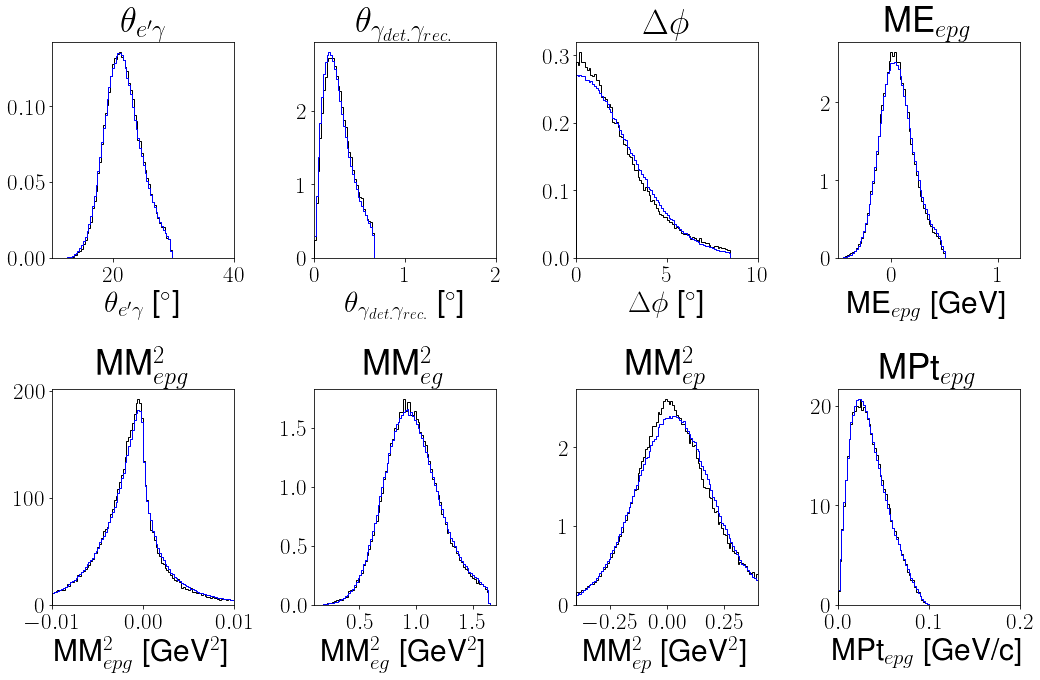

<Figure size 648x432 with 0 Axes>

In [423]:
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = simDist_dvcs#(1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 23.07016977098276
reconGam 0.3351144802912766
coplanarity 2.429913191561872
ME_epg 0.08714874918224857
MM2_epg -0.0009279543406254709
MM2_eg 0.9085132640750111
MM2_ep 0.005641113322612162
MPt 0.05313026007518125


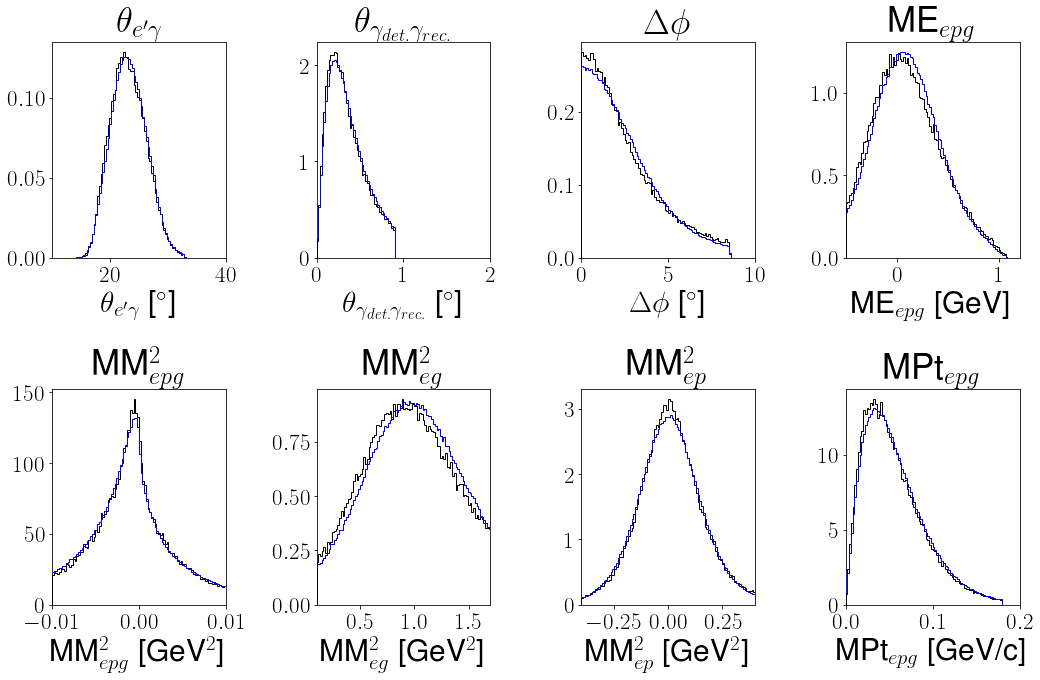

<Figure size 648x432 with 0 Axes>

In [426]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 31.211637911640018
reconGam 0.593556839675596
coplanarity 3.7796795913920604
ME_epg 0.17129236245593604
MM2_epg -0.0010753244146195573
MM2_eg 0.9774032786100729
MM2_ep -0.0062209334724472164
MPt 0.07521921056885755


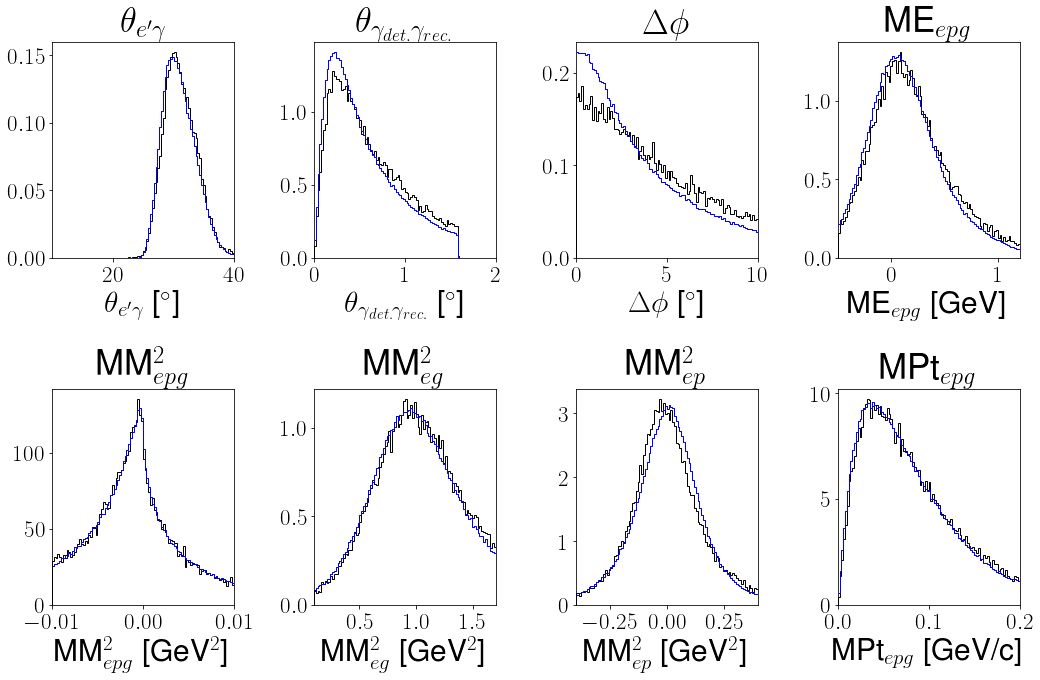

<Figure size 648x432 with 0 Axes>

In [427]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

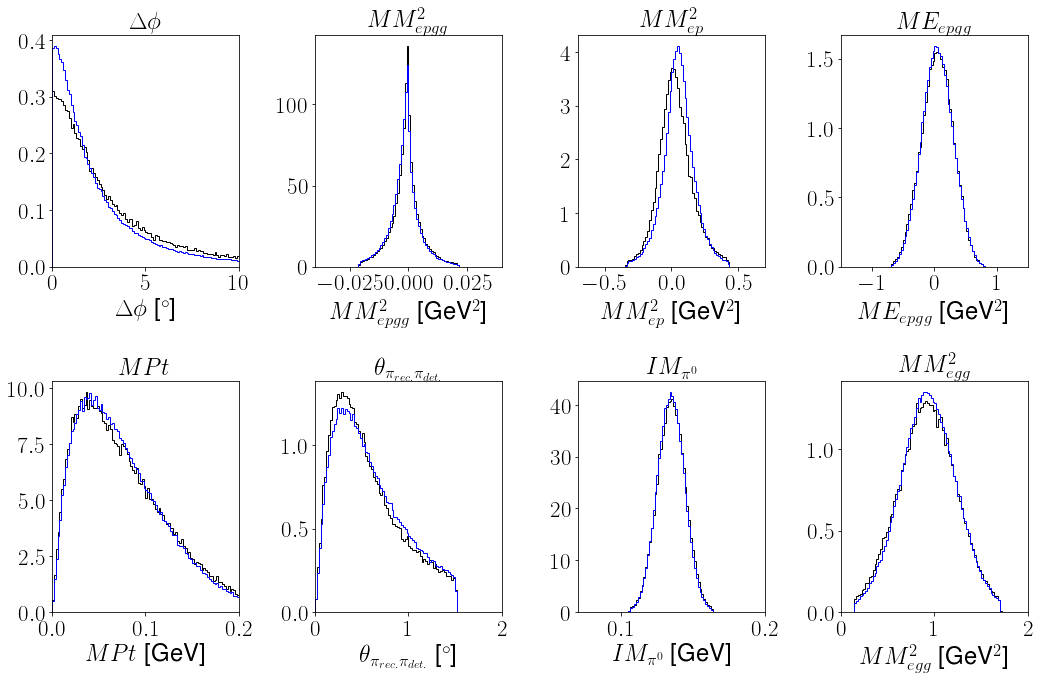

In [406]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

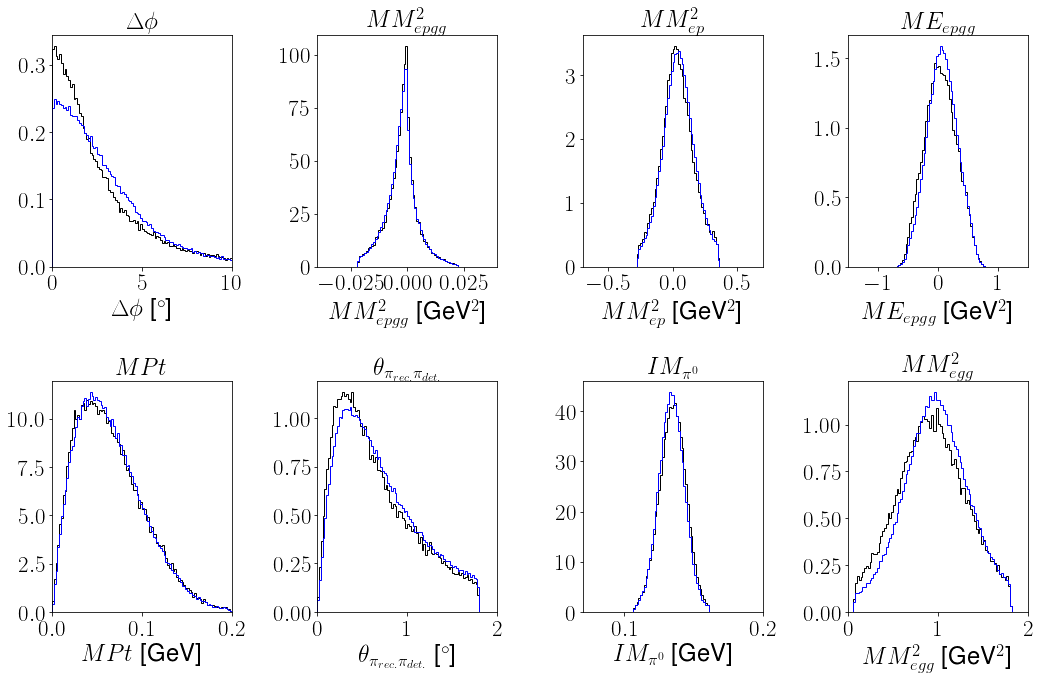

In [407]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

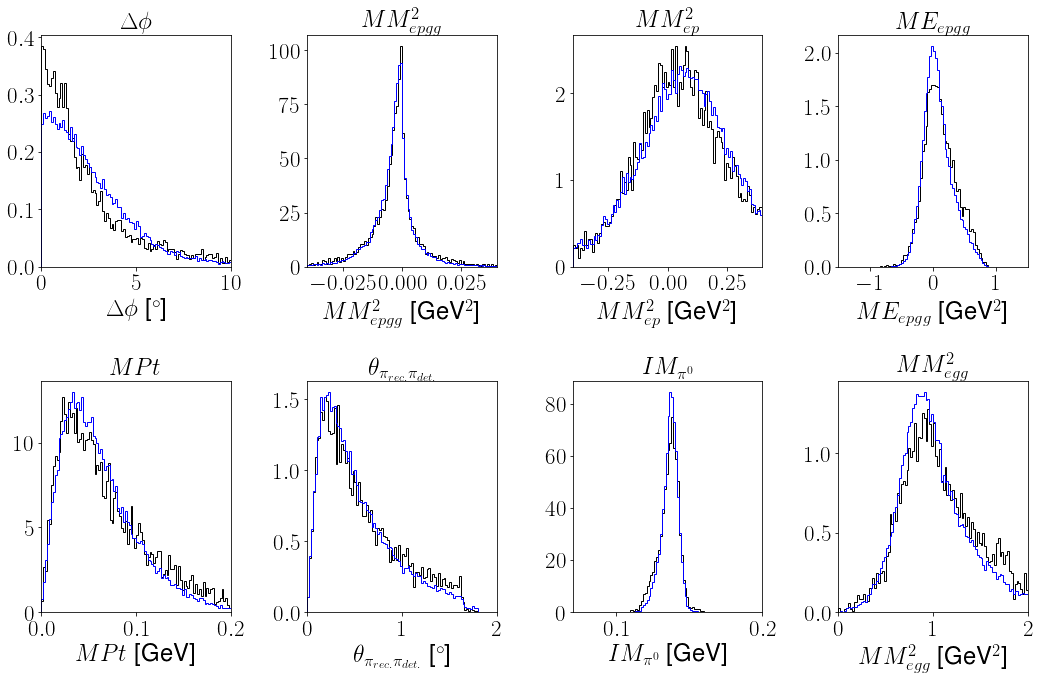

In [410]:
pi0ExpInbCDFT = pi0ExpInb.loc[(pi0ExpInb.Ge2>0.8)&((pi0ExpInb.Psector>7)&(pi0ExpInb.Ptheta<60))& (pi0ExpInb.Gsector2>7)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ge2>0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector2>7)]

varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.4, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.4, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [19]:
binMigrationInb = pd.read_pickle("../binMigrationInb.pkl")
binMigrationInb2 = pd.read_pickle("../binMigrationInb2.pkl")


In [20]:
binMigrationInb

,Q2xBtphi,GenQ2xBtphi
0,1814,1815.0
1,349,349.0
2,1364,1364.0
3,2199,2199.0
4,502,428.0
...,...,...
457641,718,719.0
457642,735,734.0
457643,1370,1370.0
457644,2235,2235.0
